In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\sonua\OneDrive\Desktop\Class\Projects\Quora_question_pairs\quora_duplicate_questions.tsv', sep='\t')

In [ ]:
df = df.iloc[0:200000,:]

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
df.shape

(200000, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            200000 non-null  int64 
 1   qid1          200000 non-null  int64 
 2   qid2          200000 non-null  int64 
 3   question1     200000 non-null  object
 4   question2     199999 non-null  object
 5   is_duplicate  200000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 9.2+ MB


In [7]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='is_duplicate'>

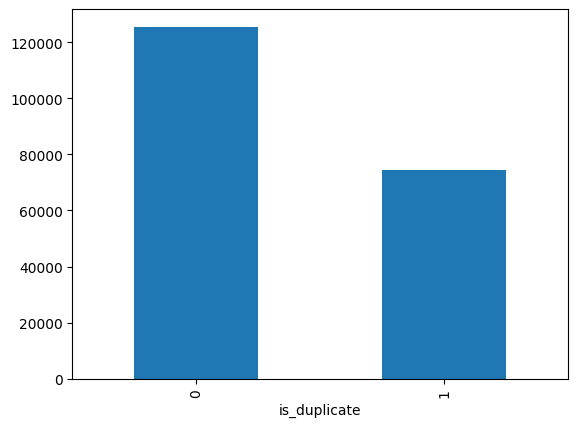

In [8]:
df['is_duplicate'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

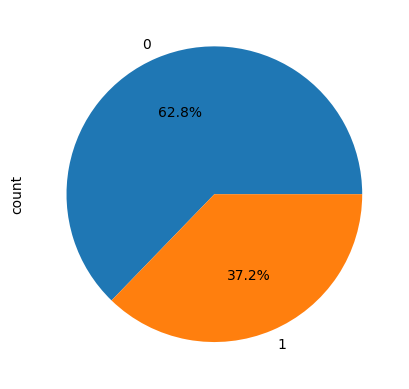

In [9]:
df['is_duplicate'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [10]:
#Repeated Questions
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of Unique Questions:',qid.unique().shape[0])
x = qid.value_counts()>1
print('Number of Repeated Questions:',x[x].shape[0])

Number of Unique Questions: 301630
Number of Repeated Questions: 47905


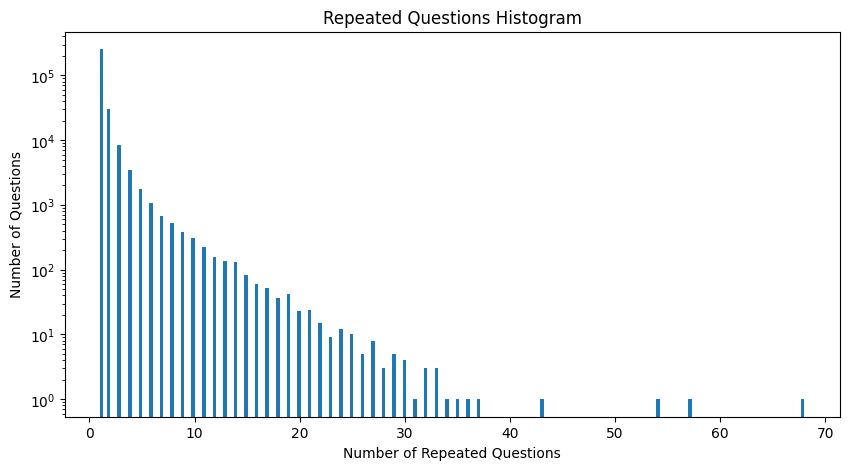

In [11]:
#Repeated Questions Histogram
plt.figure(figsize=(10,5))
plt.hist(qid.value_counts(), bins=200)
plt.yscale('log')
plt.title('Repeated Questions Histogram')
plt.xlabel('Number of Repeated Questions')
plt.ylabel('Number of Questions')
plt.show()

In [12]:
df.dropna(axis=0, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            199999 non-null  int64 
 1   qid1          199999 non-null  int64 
 2   qid2          199999 non-null  int64 
 3   question1     199999 non-null  object
 4   question2     199999 non-null  object
 5   is_duplicate  199999 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 10.7+ MB


In [14]:
#Drop the columns that are not needed
df = df.drop(columns=['qid1', 'qid2','id'], axis=1)

In [15]:
df.head()

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


## Feature Engineering
**We will add some new features to the data set**
* Q1 length---> Character length of q1
* Q2 length---> Character length of q2
* Q1 Number of Words---> Character length of q1
* Q2 Number of Words---> Character length of q2
* Words common ---> Common unique word in q1 and q2
* Words total ---> Length of total words in q1 and q2
* Words Share ---> Words Common/Words total 

In [16]:
# Q1 and Q2 Length
# Create new columns for the length of question1 and question2
df['q1_len'] = df['question1'].str.len()
df['q2_len'] = df['question2'].str.len()

In [17]:
df.head()

,question1,question2,is_duplicate,q1_len,q2_len
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39


In [18]:
# Number of Words in Q1 and Q2
df['num_words_q1'] = df['question1'].str.split().apply(len)
df['num_words_q2'] = df['question2'].str.split().apply(len)

In [19]:
df.head()

,question1,question2,is_duplicate,q1_len,q2_len,num_words_q1,num_words_q2
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7


In [20]:
def common_words(row):
    q1 = row['question1'].split()
    q2 = row['question2'].split()
    return len(set(q1) & set(q2))

df['num_common_words'] = df.apply(common_words, axis=1)
df.head()

,question1,question2,is_duplicate,q1_len,q2_len,num_words_q1,num_words_q2,num_common_words
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,10
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,4
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,3
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,2


In [21]:
def total_words(row):
    q1 = row['question1'].split()
    q2 = row['question2'].split()
    return (len(q1) + len(q2))
df['total_words'] = df.apply(total_words, axis=1)
df.head()

,question1,question2,is_duplicate,q1_len,q2_len,num_words_q1,num_words_q2,num_common_words,total_words
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,10,26
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,4,21
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,3,24
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0,20
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,2,20


In [22]:
df['word_share'] = df['num_common_words'] / df['total_words']
df.head()

,question1,question2,is_duplicate,q1_len,q2_len,num_words_q1,num_words_q2,num_common_words,total_words,word_share
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,10,26,0.384615
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,4,21,0.190476
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,3,24,0.125000
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0,20,0.000000
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,2,20,0.100000


Average Length of Question 1: 59.45087225436127
Maximum Length of Question 1: 623
Minimum Length of Question 1: 1


<Figure size 1000x500 with 0 Axes>

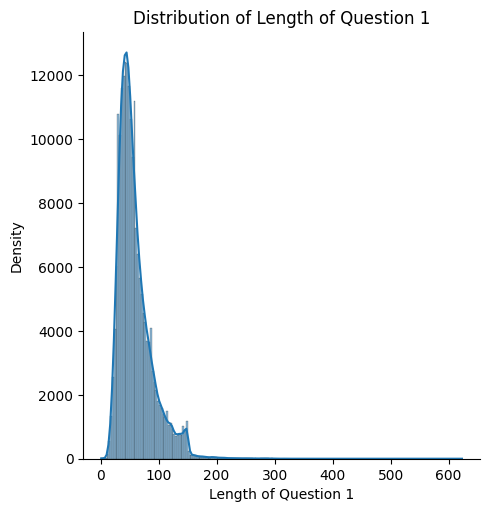

In [23]:
#ananlysis of the data
plt.figure(figsize=(10,5))
sns.displot(df['q1_len'], bins=200, kde=True)
plt.title('Distribution of Length of Question 1')
plt.xlabel('Length of Question 1')
plt.ylabel('Density')
print('Average Length of Question 1:', df['q1_len'].mean())
print('Maximum Length of Question 1:', df['q1_len'].max())
print('Minimum Length of Question 1:', df['q1_len'].min())
plt.show()

Average Length of Question 2: 60.10607053035265
Maximum Length of Question 2: 1169
Minimum Length of Question 2: 1


<Figure size 1000x500 with 0 Axes>

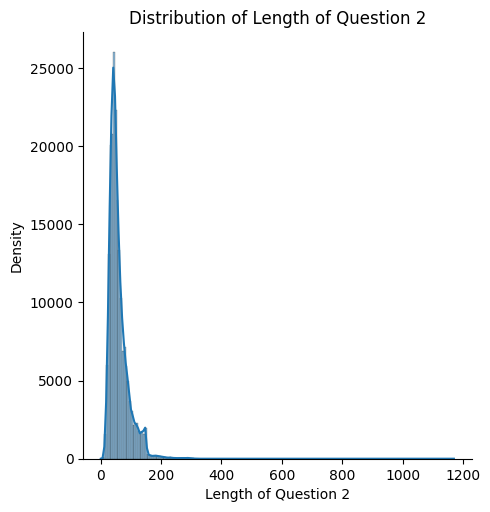

In [24]:
plt.figure(figsize=(10,5))
sns.displot(df['q2_len'], bins=200, kde=True)
plt.title('Distribution of Length of Question 2')
plt.xlabel('Length of Question 2')
plt.ylabel('Density')
print('Average Length of Question 2:', df['q2_len'].mean())
print('Maximum Length of Question 2:', df['q2_len'].max())
print('Minimum Length of Question 2:', df['q2_len'].min())
plt.show()

Minimum words : 1
Maximum words : 125
Average Num of words : 10


<Figure size 1000x500 with 0 Axes>

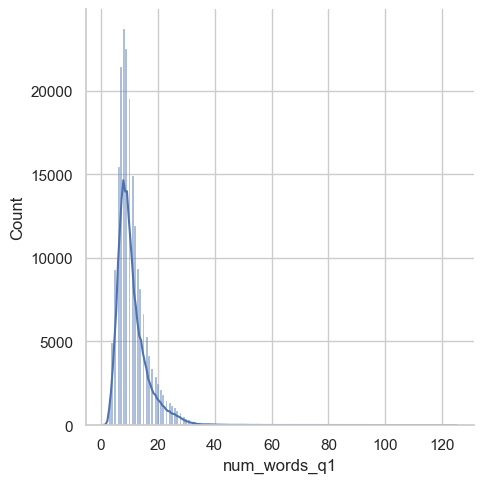

In [25]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.displot(df['num_words_q1'], bins=200, kde=True)
print('Minimum words :', df['num_words_q1'].min())
print('Maximum words :', df['num_words_q1'].max())
print('Average Num of words :', int(df['num_words_q1'].mean()))
plt.show()

Minimum words : 1
Maximum words : 237
Average Num of words : 11


<Figure size 1000x500 with 0 Axes>

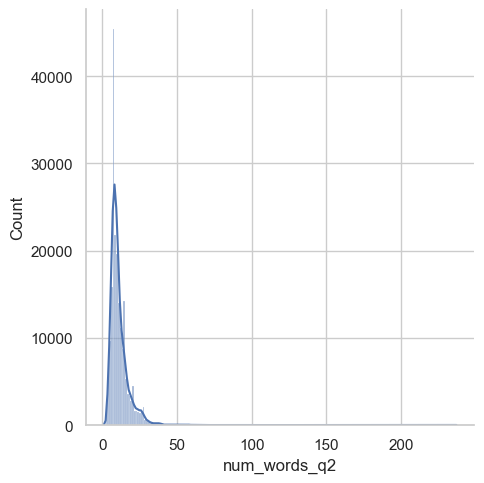

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.displot(df['num_words_q2'], bins=200, kde=True)
print('Minimum words :', df['num_words_q2'].min())
print('Maximum words :', df['num_words_q2'].max())
print('Average Num of words :', int(df['num_words_q2'].mean()))
plt.show()

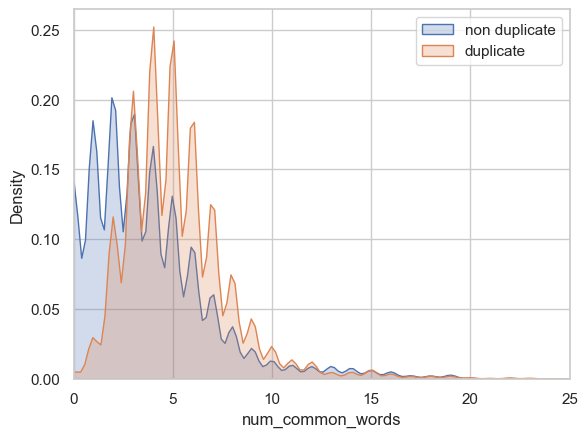

In [27]:
# Common words

sns.kdeplot(df[df['is_duplicate']==0]['num_common_words'], label='non duplicate', fill=True)
sns.kdeplot(df[df['is_duplicate']==1]['num_common_words'], label='duplicate', fill=True)
plt.xlim(0,25)
plt.legend()
plt.show()


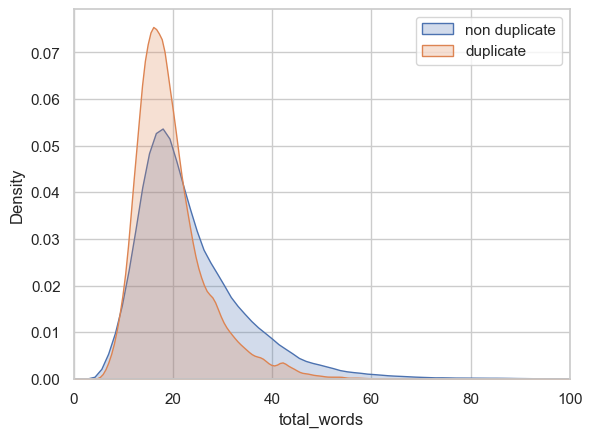

In [28]:
# Total words

sns.kdeplot(df[df['is_duplicate']==0]['total_words'], label='non duplicate', fill=True)
sns.kdeplot(df[df['is_duplicate']==1]['total_words'], label='duplicate', fill=True)
plt.xlim(0,100)
plt.legend()
plt.show()


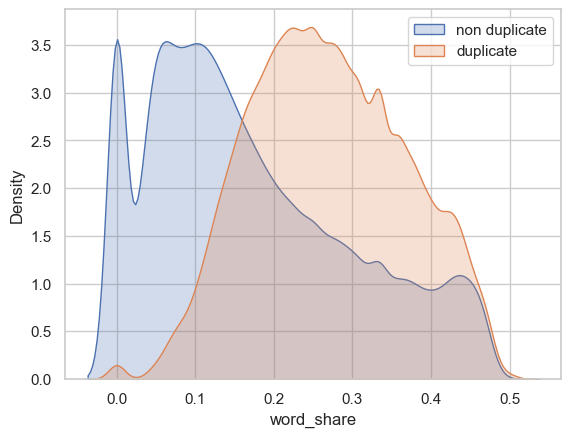

In [29]:
#Words Share

sns.kdeplot(df[df['is_duplicate']==0]['word_share'], label='non duplicate', fill=True)
sns.kdeplot(df[df['is_duplicate']==1]['word_share'], label='duplicate', fill=True)
plt.legend()
plt.show()


## Preprocessing of q1 and q2

In [30]:
# we will create a new df
que_df = df[['question1','question2']]

In [31]:
que_df.head()

,question1,question2
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?


In [32]:
final_df = df.drop(columns=['question1','question2'])
final_df.head()

,is_duplicate,q1_len,q2_len,num_words_q1,num_words_q2,num_common_words,total_words,word_share
0,0,66,57,14,12,10,26,0.384615
1,0,51,88,8,13,4,21,0.190476
2,0,73,59,14,10,3,24,0.125000
3,0,50,65,11,9,0,20,0.000000
4,0,76,39,13,7,2,20,0.100000


In [33]:
from sklearn.feature_extraction.text import CountVectorizer
questions = list(que_df['question1']) + list(que_df['question2'])

cv = CountVectorizer(max_features = 5000)
q1_arr,q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [34]:
temp_df1 = pd.DataFrame(q1_arr, index= que_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= que_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(199999, 10000)

In [49]:
chunk_size = 1000  # or 500 if still OOM
if not isinstance(final_df, pd.DataFrame):
    final_df = final_df.compute()

# Collect chunks in a list to avoid repeated concat
chunks = []
for start in range(0, temp_df.shape[1], chunk_size):
    end = min(start + chunk_size, temp_df.shape[1])
    temp_chunk = temp_df.iloc[:, start:end]
    chunks.append(temp_chunk)
    del temp_chunk  # free memory
    import gc
    gc.collect()    # force garbage collection

# Concatenate all at once
final_df = pd.concat([final_df] + chunks, axis=1)
print(final_df.shape)


MemoryError: Unable to allocate 774. MiB for an array with shape (507, 199999) and data type int64